In [1]:
from LSTM_Model.core import data_processor, model as core_model, utils
import json
import os
import math
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# model configurations
with open("sticker_model_config.json", 'r') as myfile:
    config_text=myfile.read().replace('\n', '')
configs = json.loads(config_text)
cwd = os.getcwd()
print(os.path.join(cwd+"/LSTM_Model/data/", configs['data']['filename']))
print(configs['data']['train_test_split'])
print(configs['data']['columns'])
market_data_path = "LSTM_Model/data/market_data"

/Users/yuhongc/PycharmProjects/csgo_stickers/LSTM_Model/data/market_data/Cologne 2014/Cloud9.csv
0.9
['Price']


In [3]:
#model = core_model.Model()
#model.build_model(configs)# load trained model
model = core_model.Model()
model.load_model("Saved_Models/04112018-042955-e2.h5")

[Model] Loading model from file Saved_Models/04112018-042955-e2.h5


In [23]:
# train model on each of the teams and tournaments
for tournament in list(os.listdir(market_data_path)):
    if tournament[0] == "." or tournament == "Boston 2018":
        continue
    tournament_path = os.path.join(market_data_path, tournament)
    for team in list(os.listdir(tournament_path)):
        if team[0] == "." or team == "team_info.csv":
            continue
        team_path = os.path.join(tournament_path, team)

        # for each team, create a different DataLoader
        data = data_processor.DataLoader(
            team_path,
            configs['data']['train_test_split'],
            configs['data']['columns']
        )

        # get training data
        x, y = data.get_train_data(
            seq_len=configs['data']['sequence_length'],
            normalise=not configs['data']['normalise']
        )

        # train model with data
        model.train(
            x,
            y,
            epochs=configs['training']['epochs'],
            batch_size=configs['training']['batch_size'],
            save_dir="Saved_Models"
        )

[Model] Training Started
[Model] 2 epochs, 32 batch size
Epoch 1/2
539/539 [==============================] - 2s 3ms/step - loss: 0.0036
Epoch 2/2
539/539 [==============================] - 2s 3ms/step - loss: 0.0035
[Model] Training Completed. Model saved as Saved_Models/04112018-001747-e2.h5
Time taken: 0:00:03.384140
[Model] Training Started
[Model] 2 epochs, 32 batch size
Epoch 1/2
832/832 [==============================] - 3s 3ms/step - loss: 3.0588e-04
Epoch 2/2
832/832 [==============================] - 3s 3ms/step - loss: 2.6695e-04
[Model] Training Completed. Model saved as Saved_Models/04112018-001751-e2.h5
Time taken: 0:00:05.137019
[Model] Training Started
[Model] 2 epochs, 32 batch size
Epoch 1/2
601/601 [==============================] - 2s 3ms/step - loss: 7.4071e-04
Epoch 2/2
601/601 [==============================] - 2s 3ms/step - loss: 7.0982e-04
[Model] Training Completed. Model saved as Saved_Models/04112018-001756-e2.h5
Time taken: 0:00:03.948025
[Model] Training S

In [4]:
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()

[Model] Predicting Point-by-Point...


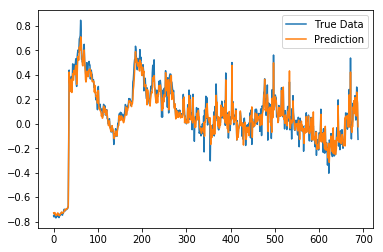

[Model] Predicting Sequences Full...


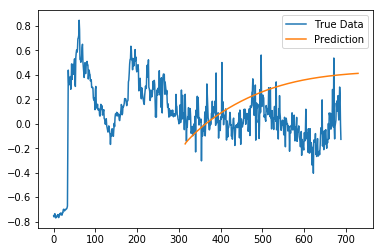

In [6]:
# use boston as test data
"""
boston_path = os.path.join(market_data_path, "Boston 2018")
team_path = os.path.join(boston_path, "Astralis.csv")
data = data_processor.DataLoader(
        team_path,
        0,
        configs['data']['columns']
    )
x_test, y_test = data.get_test_data(
        seq_len=configs['data']['sequence_length'],
        normalise=configs['data']['normalise']
    )
"""

#predictions_pointbypoint = model.predict_point_by_point(x_test)
plot_results(predictions_pointbypoint, y_test)

#predictions_fullseq = model.predict_sequence_full(x_test[-365-50:], configs['data']['sequence_length'])
plot_results([None]*(365-50)+predictions_fullseq, y_test)

In [33]:
# generate predictions with model
model_predictions=[]
market_data_path = "LSTM_Model/data/market_data"
boston_path = os.path.join(market_data_path, "Boston 2018")
for team in list(os.listdir(boston_path)):
    if team[0]=="." or team=="team_info.csv":
        continue
    team_path = os.path.join(boston_path, team)
    
    # create DataLoader for each team
    data = data_processor.DataLoader(
            team_path,
            0,
            configs['data']['columns']
        )
    x_test, y_test = data.get_test_data(
        seq_len=configs['data']['sequence_length'],
        normalise= not configs['data']['normalise']
    )
    predictions_fullseq = model.predict_sequence_full(x_test[:-365-50], configs['data']['sequence_length'])
    final_prediction = (predictions_fullseq[-1]*(x_test[-1])+1)[0][0]
    print(final_prediction)
    model_predictions.append([team[:-4], final_prediction])
model_predictions
    

[Model] Predicting Sequences Full...
1.1346900087594987
[Model] Predicting Sequences Full...
1.1011560245156289
[Model] Predicting Sequences Full...
1.0966479185819626
[Model] Predicting Sequences Full...
1.0090090640038252
[Model] Predicting Sequences Full...
1.1270368928909302
[Model] Predicting Sequences Full...
1.2120044592022896
[Model] Predicting Sequences Full...
1.2223983587026597
[Model] Predicting Sequences Full...
1.1294244700670242
[Model] Predicting Sequences Full...
1.062978572845459
[Model] Predicting Sequences Full...
1.0124491271972655
[Model] Predicting Sequences Full...
1.1266052102446555
[Model] Predicting Sequences Full...
1.2379329615831374
[Model] Predicting Sequences Full...
1.063756850719452
[Model] Predicting Sequences Full...
1.305366917014122
[Model] Predicting Sequences Full...
1.06994753408432
[Model] Predicting Sequences Full...
1.0593854107707739
[Model] Predicting Sequences Full...
1.0515415145754814
[Model] Predicting Sequences Full...
0.95467065486311

[['Team Liquid', 1.1346900087594987],
 ['Flash Gaming', 1.1011560245156289],
 ['mousesports', 1.0966479185819626],
 ['Avangar', 1.0090090640038252],
 ['Fnatic', 1.1270368928909302],
 ['Natus Vincere', 1.2120044592022896],
 ['Cloud9', 1.2223983587026597],
 ['SK Gaming', 1.1294244700670242],
 ['Gambit', 1.062978572845459],
 ['Flipsid3 Tactics', 1.0124491271972655],
 ['G2 Esports', 1.1266052102446555],
 ['FaZe Clan', 1.2379329615831374],
 ['Quantum Bellator Fire', 1.063756850719452],
 ['Astralis', 1.305366917014122],
 ['Misfits Gaming', 1.06994753408432],
 ['Renegades', 1.0593854107707739],
 ['Sprout Esports', 1.0515415145754814],
 ['BIG', 0.9546706548631191],
 ['Vega Squadron', 1.0268599675148726],
 ['Team EnVyUs', 1.0778938423842193],
 ['Virtus.Pro', 1.1233279995918273],
 ['Space Soldiers', 1.2089638690948485],
 ['North', 1.0310295298248529]]

In [31]:
# write predictions into csv file
with open("lstm_predictions.csv","w",newline="") as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(["Team", "Prediction"])
    for prediction in model_predictions:
        csvwriter.writerow(prediction)

In [ ]:
# add header for all the data

"""
market_data_path = "LSTM_Model/data/market_data"
for tournament in list(os.listdir(market_data_path)):
    if tournament[0]==".":
        continue
    tournament_path = os.path.join(market_data_path, tournament)
    for team in list(os.listdir(tournament_path)):
            if team[0]=="." or team=="team_info.csv":
                continue
            team_path = os.path.join(tournament_path, team)
            rows = [["Date","Price","Volume"]]
            with open(team_path,"r",newline="") as csvfile:
                csvreader = csv.reader(csvfile, delimiter=',', quotechar='|')
                for row in csvreader:
                    rows.append(row)
            os.remove(team_path)
            with open(team_path,"w",newline="") as csvfile:
                csvwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
                for row in rows:
                    csvwriter.writerow(row)
"""